### Fake News Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import string
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

nltk.download('all')

##Loading the data

In [ ]:
fake = pd.read_csv("Fake.csv",error_bad_lines=False,engine='python')
real = pd.read_csv("Real.csv",error_bad_lines=False,engine='python')

In [3]:
print("Fake's shape", fake.shape)
print("True's shape", real.shape)

Fake's shape (3478, 4)
True's shape (3718, 4)


##Add label for each table

In [4]:
fake['target'] = 'fake'
real['target'] = 'real'

In [5]:
real.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


In [6]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


##Concatenate tables to each other

In [7]:
data = pd.concat([fake, real])
data

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
3713,"Trump, as Comey takes spotlight, vows to stay ...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 8, 2017",real
3714,Republicans take knife to post-crisis Wall Str...,WASHINGTON (Reuters) - Republicans in the U.S....,politicsNews,"June 8, 2017",real
3715,Trump chooses fundraiser Scaramucci for ambass...,"WASHINGTON (Reuters) - Anthony Scaramucci, a R...",politicsNews,"June 8, 2017",real
3716,Q&A: What we know about U.S. probes of Russian...,(Reuters) - Former FBI Director James Comey te...,politicsNews,"June 8, 2017",real


##Shuffle rows

In [8]:
from sklearn.utils import shuffle
data = shuffle(data).reset_index(drop=True)
data

,title,text,subject,date,target
0,China Fires Warning At Trump For Contacting T...,Donald Trump has not even taken office yet and...,News,"December 3, 2016",fake
1,Ben Carson’s Prepared HUD Testimony Contained...,It looks like National Security Pick Monica Cr...,News,"January 12, 2017",fake
2,New Jersey mayor resigns after admitting corru...,"NEW YORK (Reuters) - The mayor of Paterson, Ne...",politicsNews,"September 25, 2017",real
3,Paul Ryan Claims GOP Wouldn’t Try To Have Dem...,Sometimes you get the feeling that Paul Ryan h...,News,"June 9, 2017",fake
4,Rocky start to U.S.-China talks pushes steel s...,SAN FRANCISCO (Reuters) - Shares of steel make...,politicsNews,"July 19, 2017",real
...,...,...,...,...,...
7191,Marco Rubio Just Had The Most Hilarious React...,No one likes to be touched by Donald Trump n...,News,"September 14, 2017",fake
7192,White House Sinks To New Lows Of Obstruction;...,The White House is beginning to panic. At leas...,News,"June 2, 2017",fake
7193,Top Senate Republican expresses optimism on he...,WASHINGTON (Reuters) - Senate Republican leade...,politicsNews,"June 27, 2017",real
7194,Idiot Donald Trump Jr. Just Released Russian ...,Donald Trump Jr. may have been born with a sil...,News,"July 11, 2017",fake


##Describe the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7196 entries, 0 to 7195
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    7196 non-null   object
 1   text     7196 non-null   object
 2   subject  7196 non-null   object
 3   date     7196 non-null   object
 4   target   7196 non-null   object
dtypes: object(5)
memory usage: 281.2+ KB


In [10]:
data.describe(include='all')

,title,text,subject,date,target
count,7196,7196,7196,7196,7196
unique,7170,7176,2,613,2
top,Highlights: The Trump presidency on April 26 a...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"October 13, 2017",real
freq,3,3,3718,45,3718


##Apply data cleaning

In [11]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

there is no null values

##Remove punctuations

In [12]:
data['text']=data['text'].str.lower()
data['text']=data['text'].str.translate(str.maketrans(" "," ",string.punctuation))
data

,title,text,subject,date,target
0,China Fires Warning At Trump For Contacting T...,donald trump has not even taken office yet and...,News,"December 3, 2016",fake
1,Ben Carson’s Prepared HUD Testimony Contained...,it looks like national security pick monica cr...,News,"January 12, 2017",fake
2,New Jersey mayor resigns after admitting corru...,new york reuters the mayor of paterson new je...,politicsNews,"September 25, 2017",real
3,Paul Ryan Claims GOP Wouldn’t Try To Have Dem...,sometimes you get the feeling that paul ryan h...,News,"June 9, 2017",fake
4,Rocky start to U.S.-China talks pushes steel s...,san francisco reuters shares of steel makers ...,politicsNews,"July 19, 2017",real
...,...,...,...,...,...
7191,Marco Rubio Just Had The Most Hilarious React...,no one likes to be touched by donald trump n...,News,"September 14, 2017",fake
7192,White House Sinks To New Lows Of Obstruction;...,the white house is beginning to panic at least...,News,"June 2, 2017",fake
7193,Top Senate Republican expresses optimism on he...,washington reuters senate republican leader m...,politicsNews,"June 27, 2017",real
7194,Idiot Donald Trump Jr. Just Released Russian ...,donald trump jr may have been born with a silv...,News,"July 11, 2017",fake


##Data pre processing

In [13]:
data['text']=data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop = stopwords.words('english')
data['text']=data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
st = PorterStemmer()
data['text']=data['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
lemmatizer=WordNetLemmatizer()
data['text']=data['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
data['text']

0       donald trump even taken offic yet alreadi piss...
1       look like nation secur pick monica crowley pla...
2       new york reuter mayor paterson new jersey resi...
3       sometim get feel paul ryan forgotten exactli w...
4       san francisco reuter share steel maker ralli w...
                              ...                        
7191    one like touch donald trump even fellow republ...
7192    white hous begin panic least logic conclus lat...
7193    washington reuter senat republican leader mitc...
7194    donald trump jr may born silver spoon mouth se...
7195    reuter member u presid donald trump’ strateg p...
Name: text, Length: 7196, dtype: object

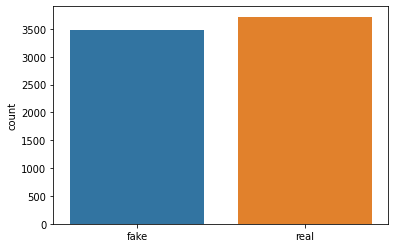

In [14]:
sns.countplot(x='target', data=data).set_xlabel('');

##Most frequent fake words

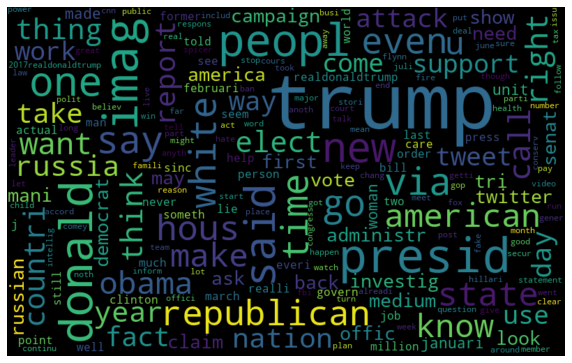

In [15]:
fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Most frequent Real words

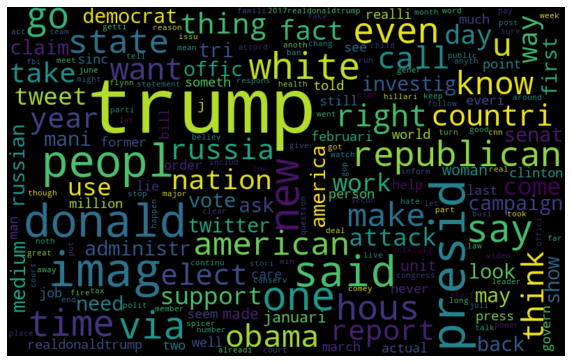

In [16]:
real_data = data[data["target"] == "real"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

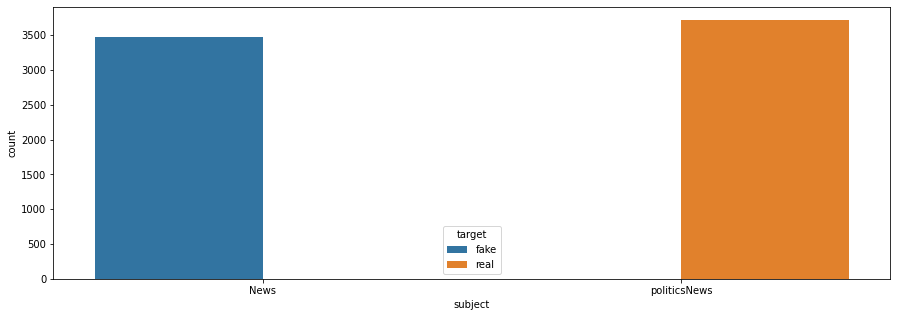

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='subject', data=data, hue='target');

most real news is PoliticsNews subject

most fake news is News subject

In [18]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data.head()

,title,text,subject,date,target,year,month
0,China Fires Warning At Trump For Contacting T...,donald trump even taken offic yet alreadi piss...,News,2016-12-03,fake,2016,12
1,Ben Carson’s Prepared HUD Testimony Contained...,look like nation secur pick monica crowley pla...,News,2017-01-12,fake,2017,1
2,New Jersey mayor resigns after admitting corru...,new york reuter mayor paterson new jersey resi...,politicsNews,2017-09-25,real,2017,9
3,Paul Ryan Claims GOP Wouldn’t Try To Have Dem...,sometim get feel paul ryan forgotten exactli w...,News,2017-06-09,fake,2017,6
4,Rocky start to U.S.-China talks pushes steel s...,san francisco reuter share steel maker ralli w...,politicsNews,2017-07-19,real,2017,7


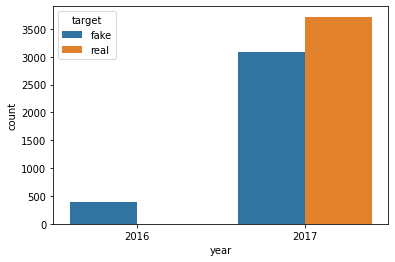

In [19]:
sns.countplot(x='year', data=data, hue='target');

most real news was in 2017

most fake news was in 2016


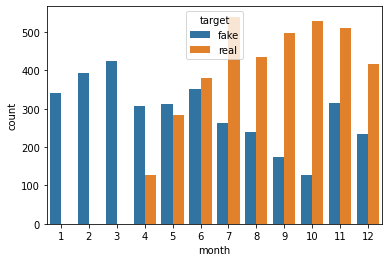

In [20]:
sns.countplot(x='month', data=data, hue='target');

The fake news increases in the first quarter of the year

##Peparing the data before modeling

In [21]:
data.drop(labels=['title', 'subject','date', 'year','month'], axis=1, inplace=True)
data.head()

,text,target
0,donald trump even taken offic yet alreadi piss...,fake
1,look like nation secur pick monica crowley pla...,fake
2,new york reuter mayor paterson new jersey resi...,real
3,sometim get feel paul ryan forgotten exactli w...,fake
4,san francisco reuter share steel maker ralli w...,real


In [22]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

##Decision Tree Classifier


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.58%


##Confusion matrix

In [24]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


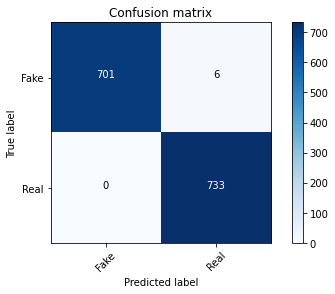

In [25]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##Logistic regression


In [26]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.96%


Confusion matrix, without normalization


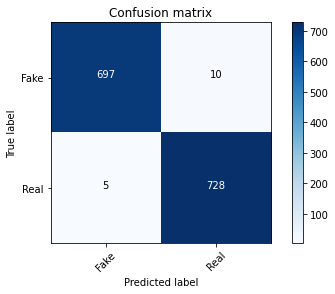

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

##Random Forest Classifier


In [28]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.58%


Confusion matrix, without normalization


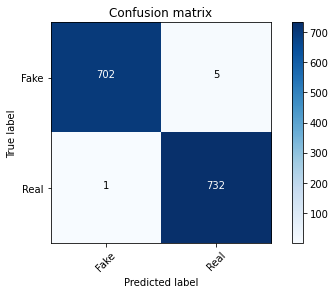

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])